In [ ]:
# Some common packages that we may need
from pandas.plotting import scatter_matrix 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

def load_police_data():
  crimes=pd.read_csv('/content/sample_data/Crime_Data.csv')
  return crimes

Now that the data is loaded we want to look at the data and see how it is organized and what groups are being used. We can also get some insight onto if the data may be useful adn we can look and see how we may split or encode our data.

In [ ]:
crimes = load_police_data()
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24577 entries, 0 to 24576
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24577 non-null  int64  
 1   Offense           24577 non-null  object 
 2   IncidentID        24577 non-null  float64
 3   BlockNumber       23229 non-null  float64
 4   StreetName        24577 non-null  object 
 5   Agency            24577 non-null  object 
 6   DateReported      24577 non-null  object 
 7   HourReported      24577 non-null  int64  
 8   ReportingOfficer  24534 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.7+ MB


In [ ]:
crimes.head(10)

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
0,1,Larceny - All Other,2.022000e+11,800.0,ELLIOTT AVE,CPD,2022/10/18 01:08:59+00,2108,"Lowe, Courtney"
1,2,Burglary,2.022000e+11,800.0,RAYMOND RD,CPD,2022/10/18 00:31:50+00,2031,"Lowe, Courtney"
2,3,Assault Aggravated,2.022000e+11,900.0,W MAIN ST,CPD,2022/10/17 23:40:34+00,1940,"Alfonso, Sean"
3,4,Assist Citizen - Mental/TDO/ECO,2.022000e+11,600.0,E MARKET ST,CPD,2022/10/17 22:24:21+00,1824,"Lowe, Courtney"
4,5,Assault Simple,2.022000e+11,1400.0,UNIVERSITY AVE,CPD,2022/10/17 19:58:39+00,1558,"Houchens, Logan"
5,6,Trespass,2.022000e+11,500.0,PRESTON AVE,CPD,2022/10/17 17:35:18+00,1335,"Houchens, Jamell"
6,7,Motor Vehicle Theft,2.022000e+11,600.0,14TH ST NW,CPD,2022/10/17 14:54:03+00,1054,"Nash, Darius"
7,8,Larceny - Theft from Building,2.022800e+11,100.0,BAYLOR LN,CPD,2022/10/17 13:24:02+00,924,"Moje, Ashley"
8,9,Larceny - From Motor Vehicle,2.022800e+11,1400.0,FOREST RIDGE RD,CPD,2022/10/17 12:39:53+00,839,"Moje, Ashley"
9,10,Drug/Narcotics Violation,2.022000e+11,1700.0,HYDRAULIC RD,CPD,2022/10/17 10:40:25+00,640,"Curry, Brian"


In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24577 entries, 0 to 24576
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24577 non-null  int64  
 1   Offense           24577 non-null  object 
 2   IncidentID        24577 non-null  float64
 3   BlockNumber       23229 non-null  float64
 4   StreetName        24577 non-null  object 
 5   Agency            24577 non-null  object 
 6   DateReported      24577 non-null  object 
 7   HourReported      24577 non-null  int64  
 8   ReportingOfficer  24534 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.7+ MB


# Non Numerical Data

Now lets look a little closer at the non numerical data

In [ ]:
crimes["Offense"].value_counts()

Hit and Run                         2120
Assault Simple                      1963
Suspicious Activity                 1634
Vandalism                           1609
Larceny - All Other                 1557
                                    ... 
Tactical Crime Initiative - TCI        1
911 Investigation                      1
Prostitution-assisting/promoting       1
Field Interview                        1
Alarm-Accidental                       1
Name: Offense, Length: 119, dtype: int64

In [ ]:
crimes["StreetName"].value_counts()

E MARKET ST               1134
EMMET ST N                1048
W MAIN ST                 1007
E MAIN ST                  520
5TH ST SW                  450
                          ... 
1ST ST S, 207                1
MICHIE DR, 115               1
HOLIDAY DR, 116              1
CULBRETH RD / RUGBY RD       1
15TH ST NW, 2013             1
Name: StreetName, Length: 3401, dtype: int64

In [ ]:
crimes["Agency"].value_counts()

CPD    24577
Name: Agency, dtype: int64

In [ ]:
crimes["DateReported"].value_counts()

2017/10/21 12:30:00+00    6
2018/06/29 02:20:19+00    6
2017/11/04 15:00:00+00    4
2019/10/07 18:46:09+00    4
2018/06/15 14:08:49+00    4
                         ..
2021/04/02 19:55:45+00    1
2021/04/03 00:29:07+00    1
2021/04/03 02:48:26+00    1
2021/04/03 03:17:20+00    1
2017/10/20 04:35:00+00    1
Name: DateReported, Length: 24453, dtype: int64

In [ ]:
crimes["ReportingOfficer"].value_counts()

Moje, Ashley        1060
Shiflett, Tammy      611
Stein, Nathan        523
Newton, Arla         472
Pittman, Terry       447
                    ... 
Arnette, Locia         1
Beasley, Timothy       1
Hopkins, Emma          1
Cosgro, Blaine         1
Thomas, Alfred         1
Name: ReportingOfficer, Length: 175, dtype: int64

There are a lot of categories in the non-numerical data. This is not as worrying as it could be since a lot of the data seems like it is unnecessary for our project. It does not seem like we are going to need Reporting Officer, Agency, and Date Reported. We can just use the hours integer to get the time. 

Small side note: It would be interesting to look up odds of getting arrested on certain streets depending on who is on duty, but that is outside of the scope of our particular project. 

# Numerical Data

Now we will look at histograms of the numerical data below. From this data we will determine what is important information and what is not. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e802aca90>,
      dtype=object)

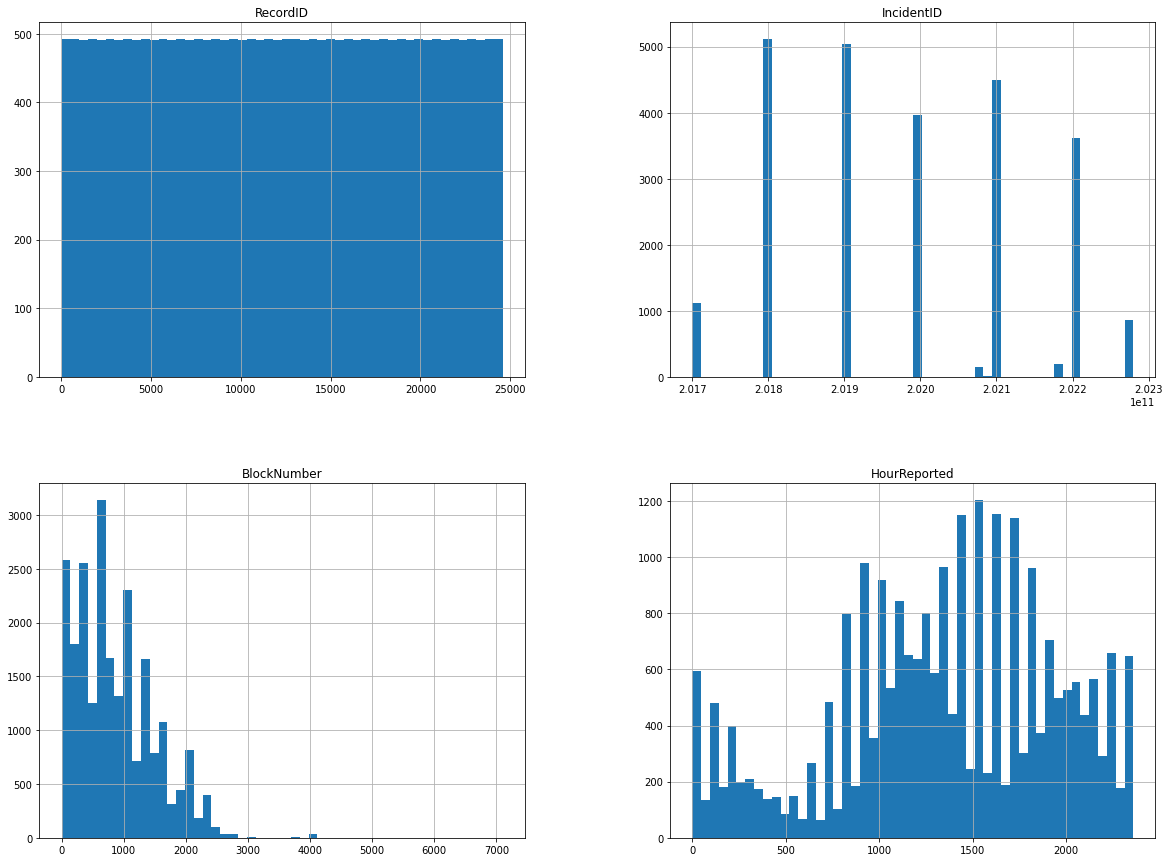

In [ ]:
crimes.hist(bins=50, figsize=(20,15))

The histrogram of the Record ID behaved exactly as expected. We assumed that Incident ID would also not be very useful but it is organized by year, which will not really fit into what we are doing for this part of the project, but it would be interesting to look at what crimes have become less frequent over time, and it may actually play a role so even though we initially plan on getting rid of it, we will reevaluate as we continue to work on the project. 
There are some correlations with lower block numbers having more incidents which we did not suspect as a group but more incidents at later hours was something we expeted but there is some strange behavior where it rises and falls from hour to hour which we did not suspect. 

# Null Data




First we will observe the null data and think of a plan to deal with it.

In [ ]:
incomplete_data = crimes[crimes.isnull().any(axis=1)].head()
incomplete_data

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
15,16,Hit and Run,2.022000e+11,NaN,BAILEY RD @ 5TH ST,CPD,2022/10/16 23:08:33+00,1908,"Alfonso, Sean"
39,40,Hit and Run,2.022000e+11,NaN,ALTAMONT CIR / W HIGH ST,CPD,2022/10/15 05:38:27+00,138,"Lowry, Brent"
55,56,Hit and Run,2.022000e+11,NaN,IVY RD / EMMET ST N,CPD,2022/10/14 04:47:19+00,47,"Hounsel, Eli"
57,58,Vandalism,2.022000e+11,NaN,GARRETT ST / 2ND ST SE,CPD,2022/10/14 03:58:33+00,2358,"Blackwell, Ryan"
71,72,Assist Citizen - Welfare Check,2.022000e+11,NaN,LANKFORD AVE / 1ST ST S,CPD,2022/10/13 01:58:30+00,2158,"Whitten, Tobyn"


In [ ]:
crimes_without_null = crimes.dropna()
crimes_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23189 entries, 0 to 24576
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          23189 non-null  int64  
 1   Offense           23189 non-null  object 
 2   IncidentID        23189 non-null  float64
 3   BlockNumber       23189 non-null  float64
 4   StreetName        23189 non-null  object 
 5   Agency            23189 non-null  object 
 6   DateReported      23189 non-null  object 
 7   HourReported      23189 non-null  int64  
 8   ReportingOfficer  23189 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24577 entries, 0 to 24576
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          24577 non-null  int64  
 1   Offense           24577 non-null  object 
 2   IncidentID        24577 non-null  float64
 3   BlockNumber       23229 non-null  float64
 4   StreetName        24577 non-null  object 
 5   Agency            24577 non-null  object 
 6   DateReported      24577 non-null  object 
 7   HourReported      24577 non-null  int64  
 8   ReportingOfficer  24534 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.7+ MB


Looking at the data we see that there are about 1300 missing block numbers, I am not sure how cobining this data with the streetnames is going to work but we will try to use an imputer but it may cause some strange behaviors that will need to be looked at later depending on our observations.

In [ ]:
imputer = SimpleImputer(strategy="median")

Here we are going to look at imputing the data but we decided we would get rid of the values that do not matter first. 

In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24577 entries, 0 to 24576
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Offense       24577 non-null  object 
 1   BlockNumber   23229 non-null  float64
 2   StreetName    24577 non-null  object 
 3   HourReported  24577 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 768.2+ KB


In [ ]:
crimes = crimes.drop("ReportingOfficer",axis=1)
crimes = crimes.drop("DateReported", axis=1)
crimes = crimes.drop("IncidentID", axis=1)
crimes = crimes.drop("Agency", axis=1)
crimes = crimes.drop("RecordID", axis=1)

KeyError: ignored

In [ ]:
crime_num = crimes.drop(["Offense", "StreetName"], axis=1)

In [ ]:
imputer.fit(crime_num)

SimpleImputer(strategy='median')

Just want to look at the data in the imputed state

In [ ]:
imputer.statistics_

array([ 800., 1405.])

In [ ]:
crime_num.median().values

array([ 800., 1405.])

Now we need to deal with the categorical data. This is where some big adjustments to what we have inputneed to happen. 

In [ ]:
crime_offense_cat = crimes[["Offense"]]
crime_offense_cat.head(10)

,Offense
0,Larceny - All Other
1,Burglary
2,Assault Aggravated
3,Assist Citizen - Mental/TDO/ECO
4,Assault Simple
5,Trespass
6,Motor Vehicle Theft
7,Larceny - Theft from Building
8,Larceny - From Motor Vehicle
9,Drug/Narcotics Violation


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
crime_offense_cat_encoded = ordinal_encoder.fit_transform(crime_offense_cat)
crime_offense_cat_encoded[:10]

array([[ 62.],
       [ 24.],
       [ 11.],
       [ 18.],
       [ 13.],
       [114.],
       [ 77.],
       [ 69.],
       [ 64.],
       [ 39.]])

In [ ]:
ordinal_encoder.categories_

[array(['911 Investigation', 'Accident - w/out Injuries',
        'Accident Private Property', 'Accident Property Damage',
        'Accident w/Injuries', 'Alarm - True', 'Alarm - Unknown',
        'Alarm-Accidental', 'Animal - Bite', 'Animal Complaint', 'Arson',
        'Assault Aggravated', 'Assault Intimidation', 'Assault Simple',
        'Assist Agency - Arrest/warrant', 'Assist Agency - Backup/Assist',
        'Assist Agency - Other', 'Assist Citizen - Medical',
        'Assist Citizen - Mental/TDO/ECO', 'Assist Citizen - Misc',
        'Assist Citizen - Welfare Check', 'Assisted on Prev Reported',
        'Attemped Suicide', 'Bomb Threat', 'Burglary', 'COVID-19 Tracking',
        'Child Ab - Contr to Delinquency',
        'Comm Relations Initiative - CRI', 'Computer Crime',
        'Crime Prevent Initiative - CPI', 'Crisis Assessment',
        'Curfew/Loitering/Vagrancy', 'Death Investigation - DOA',
        'Disorderly Conduct', 'Disturbance - Non Domestic',
        'Domestic Dis

So many categories, Here is where we need to categorize the catagories, I am thinking violent crimes, none-violent crimes, and no crimes, but maybe binary choices is more optimal. We may do some testing and see what works best for the model.